In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [117]:
a = 0
b = 1
Nplots = 1025
N = 3 #degree fo polynomial space
x = linspace(a,b,Nplots)
q = linspace(a,b,N) #Points of interpolation

In [28]:
def myplot(f, plotpoints=x, interpolationspoints=q): #it use x and q by default if defined
    plot(interpolationspoints,f(interpolationspoints),'or')
    plot(plotpoints,f(plotpoints))

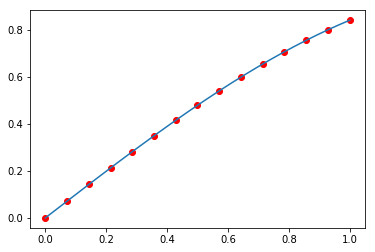

In [33]:
myplot(sin)

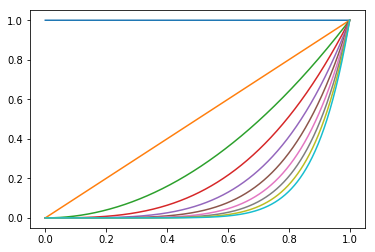

In [34]:
for i in range(10):
    plot(x,x**i)

In [39]:
B = zeros((N,N))

In [87]:
B = array([q**i for i in range(N)])

In [58]:
B

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.25      , 0.5       , 0.75      , 1.        ],
       [0.        , 0.0625    , 0.25      , 0.5625    , 1.        ],
       [0.        , 0.015625  , 0.125     , 0.421875  , 1.        ],
       [0.        , 0.00390625, 0.0625    , 0.31640625, 1.        ]])

In [67]:
for i in range(N):
    B[:,i] = q**i

In [118]:
B = q.reshape((N,1))**arange(N)
B = vstack(q)**arange(N)

In [79]:
B

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.25      , 0.0625    , 0.015625  , 0.00390625],
       [1.        , 0.5       , 0.25      , 0.125     , 0.0625    ],
       [1.        , 0.75      , 0.5625    , 0.421875  , 0.31640625],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [89]:
C = inv(B)

In [90]:
B.dot(C)

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.61827177e-11,  1.00000000e+00, -6.50441967e-09,
         8.56902770e-09, -7.23278272e-09,  1.68306776e-07,
        -5.75070191e-08,  9.30403926e-08, -1.86465593e-07,
         1.70619762e-07, -8.34154480e-09,  1.50739993e-08,
        -5.75822366e-09,  1.56599669e-09, -1.31770480e-10],
       [-2.14126331e-10,  2.07760893e-09,  9.99999985e-01,
         4.55041885e-08, -7.33879832e-08,  3.47860628e-07,
        -2.68284929e-07,  2.74844919e-07, -5.27397882e-07,
         3.72701775e-07, -5.94029225e-08,  4.09626149e-08,
        -1.43764108e-08,  3.08224430e-09, -2.59830783e-10],
       [-8.49057220e-11, -1.08429189e-09,  2.75605140e-09,
         9.99999995e-01,  9.25140063e-08,  4.50759215

In [91]:
cond(B)

403235308988.2878

In [106]:
I = arange(N)
X = x.reshape((-1,1))
X = X**I

In [107]:
X.shape

(1025, 3)

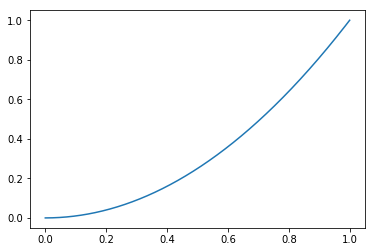

In [110]:
#Plot 1+2*x +3*x^2
p = array([0,0,1])
plot(x, X.dot(p))

In [119]:
def myfun(x):
    return sin(2*pi*x)

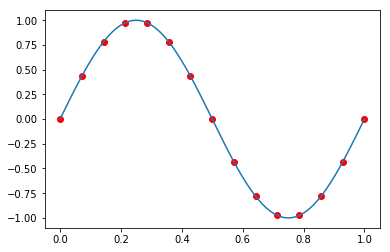

In [120]:
myplot(myfun)

In [122]:
# compute the polynomial
p = inv(B).dot(myfun(q))

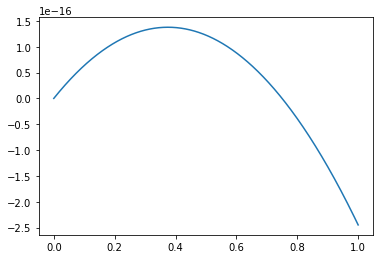

In [123]:
plot(x, X.dot(p))

In [138]:
def lagrange_basis(q,x):
    N = len(q)
    I = arange(N)
    Qvec = q.reshape((-1,1))
    Xvec = x.reshape((-1,1))
    B = Qvec**I
    V = Xvec**I
    
    L = V.dot(inv(B))
    return L

In [ ]:
def interpolation(myfun, q, x):
    """Return the polynomial interpolation of myfun"""
    N = len(q)
    I = arange(N)
    Qvec = q.reshape((-1,1))
    Xvec = x.reshape((-1,1))
    B = Qvec**I
    V = Xvec**I
    p = inv(B).dot(myfun(q))
    return V.dot(p)

In [125]:
myf = lambda x : 1./(1 + 50 *(x-.5)**2)

In [136]:
y = interpolation(myf, linspace(0,1,20), x)

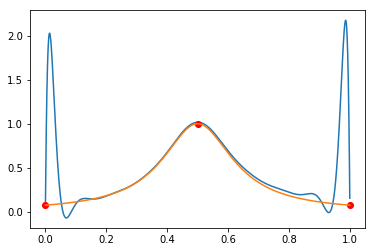

In [137]:
plot(x,y)
plot(q,myf(q), 'ro')
plot(x,myf(x))

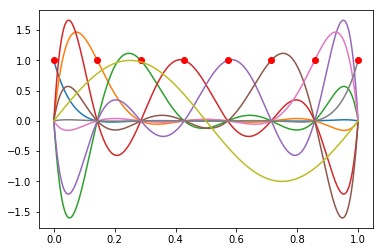

In [148]:
q = linspace(0,1,8)
L = lagrange_basis(q,x)
plot(x,L)
plot(q, 0*q+1, 'ro')

plot(x, L.dot(myfun(q)))

In [143]:
q

array([0. , 0.5, 1. ])